# Model Developement

Now that we have pre-processed the training and test data, we can finally start fitting models to predict credit card defaulters.

In [59]:
#Loading necesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [60]:
#Loading the training and test data
X_train = pd.read_csv('D:\Team Project\data\preprocessing\X_train.csv')
X_test = pd.read_csv('D:\Team Project\data\preprocessing\X_test.csv')
y_train = pd.read_csv('D:\Team Project\data\preprocessing\y_train.csv')
y_test = pd.read_csv('D:\Team Project\data\preprocessing\y_test.csv')

# Binary Classification Model
For the problem of binary classification, the first model that comes to mind is the simple logistic regression model.

## 1. Logistic Regression

Inititally, let's fit a logistic regression model to the training data blindly and see how it performs.

In [61]:
# Loading logistic regression model object from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

In [62]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

#### Measuring the Performance Metrics of the Model

In [63]:
#Performance metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Calculate and print performance metrics
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
 [[4821  278]
 [ 683  733]]
Accuracy: 85.25%
Precision: 72.50%
Recall: 51.77%
F1 Score: 60.40%



Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      5099
           1       0.73      0.52      0.60      1416

    accuracy                           0.85      6515
   macro avg       0.80      0.73      0.76      6515
weighted avg       0.84      0.85      0.84      6515

ROC-AUC Score: 0.87


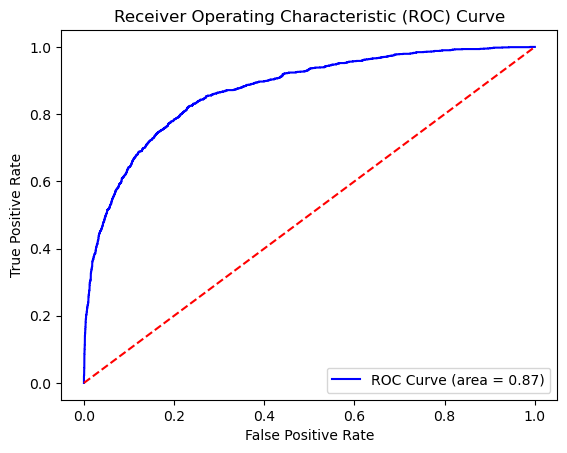

In [64]:
# Optional: Print the full classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score: {:.2f}".format(roc_auc))

 #### Conclusions
+ The model has an accuracy score of 85.25% meaning it makes correct predictions almost 85% of the times.
+ The precision score is 72.50% which implies that when the model predicts defaulters, it is correct 73% of the times
+ As we see the model has a recall score of 51.77% which means it does not perform very well in capturing all the defaulters.

##### But can its performance be improved? Let's first check whether the assumptions of logistic regression are satisfied by the data.

#### Assumptions of Logistic Regression
+ First, binary logistic regression requires the dependent variable to be binary. (satisfied)
+ Second, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.
+ Third, logistic regression assumes linearity of independent variables and log odds of the dependent variable.

#### Let's check for multicollinearity in our dataset

<Axes: >

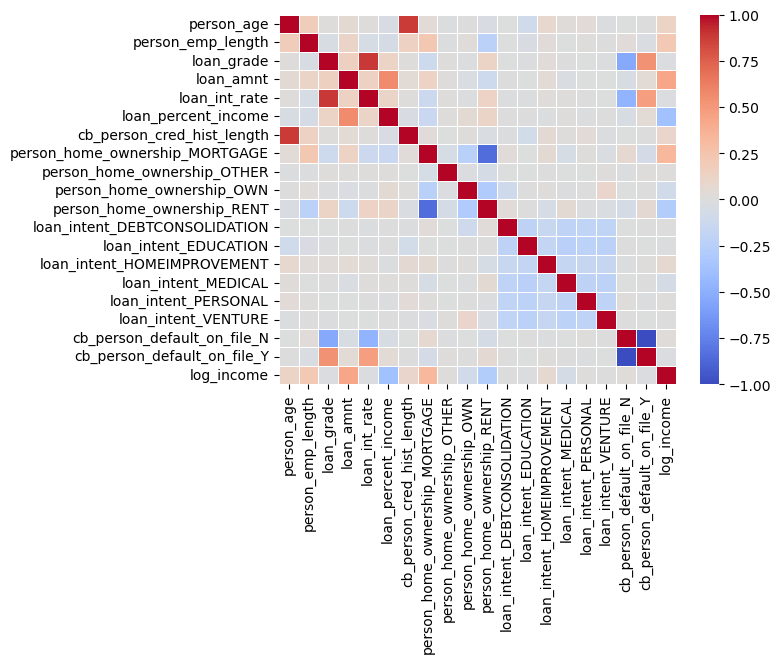

In [65]:
sns.heatmap(X_train.corr(), cmap='coolwarm',linewidths=0.5)

From the heatmap, some of the pairs of highly correlated features are:
+ Age and Credit History Length
+ Loan amount & loan percent income
+ Loan Grade and Loan Interest Rate
+ Loan interest rate and past default history
+ Loan grade and past default history

So based on these findings, we drop the following features
+ Age
+ Loan amount
+ Loan interest rate
+ Past default history

In [66]:
X_train_new = X_train.drop(['person_age','loan_amnt','loan_int_rate','cb_person_default_on_file_Y','cb_person_default_on_file_N'],axis=1)
X_test_new = X_test.drop(['person_age','loan_amnt','loan_int_rate','cb_person_default_on_file_Y','cb_person_default_on_file_N'],axis=1)

<Axes: >

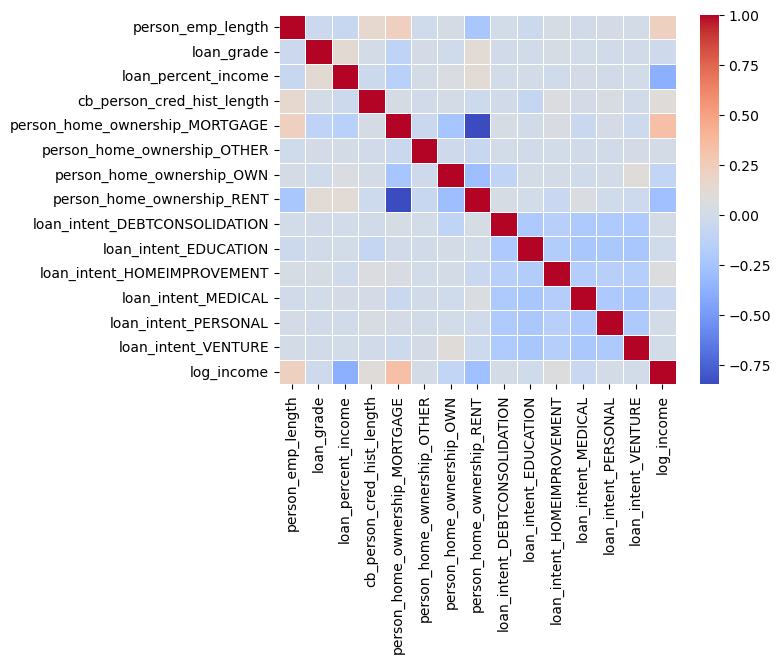

In [67]:
sns.heatmap(X_train_new.corr(), cmap='coolwarm',linewidths=0.5)

In [68]:
# Fit the model to the new training data
log_reg.fit(X_train_new, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_new)
y_pred_prob = log_reg.predict_proba(X_test_new)[:, 1]

In [69]:
# Calculate and print performance metrics
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
 [[4831  268]
 [ 677  739]]
Accuracy: 85.50%
Precision: 73.39%
Recall: 52.19%
F1 Score: 61.00%


ROC-AUC Score: 0.87


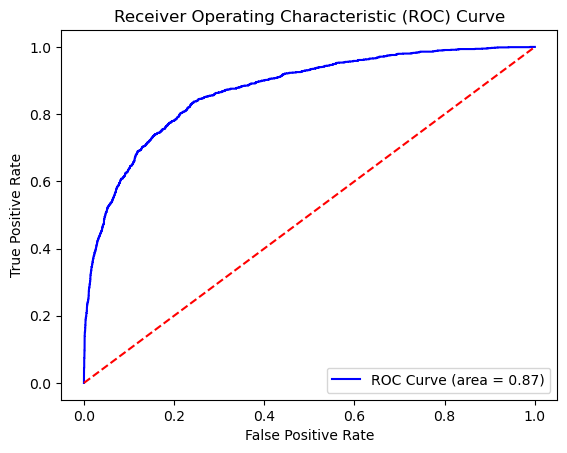

In [70]:
# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score: {:.2f}".format(roc_auc))

After removing multicollinearity from the data there is slight improvement in the recall and F1 score

####  Method 2: Using L1 (Lasso) regularization
Using L1 regularization we can counter overfitting as well as perform feature selection. The L1 regularization will perform feature selection for us and as a result remove multicollinearity from the data

In [71]:
# Initialize and fit the Lasso (L1) logistic regression model
log_reg_lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
log_reg_lasso.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg_lasso.predict(X_test)
y_pred_prob = log_reg_lasso.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Accuracy: 85.17%
Precision: 72.15%
Recall: 51.77%
F1 Score: 60.28%


ROC-AUC Score: 0.87


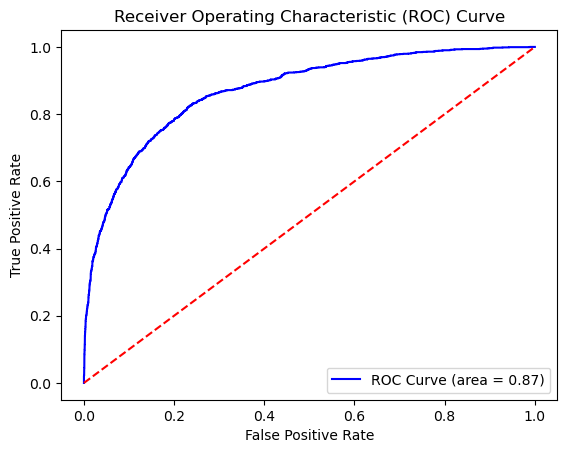

In [58]:
# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score: {:.2f}".format(roc_auc))

It seems that that even with L1 regularization, the performance of Logistic Regression model could not be improved further. Next we will try K-Nearest Neighbour or KNN classifer algorithm.